# 🛒 Market Basket Analysis using Apriori Algorithm

## 📚 What is Market Basket Analysis?

**Market Basket Analysis** is a data mining technique used to discover relationships between products that customers buy together. It's like finding hidden patterns in shopping behavior!

### Real-World Example:
- 🍞 **Bread** + 🧈 **Butter** → Often bought together!
- 🍺 **Beer** + 👶 **Diapers** → Famous retail finding!

### 🎯 Project Goals:
1. Find which products are frequently bought together
2. Generate association rules for product recommendations
3. Visualize interesting patterns
4. Build an interactive recommendation system

---

## 🧠 Understanding the Apriori Algorithm

The **Apriori algorithm** helps us find frequent itemsets (groups of items bought together) using three key metrics:

### 📊 Key Metrics:

1. **Support** = How often items appear together
   - Formula: `Support(A,B) = Transactions containing A and B / Total Transactions`
   - Example: If 20 out of 100 customers buy {Bread, Butter} → Support = 20%

2. **Confidence** = If someone buys A, how likely they buy B
   - Formula: `Confidence(A→B) = Transactions containing A and B / Transactions containing A`
   - Example: If 30 people buy Bread, and 20 also buy Butter → Confidence = 66.7%

3. **Lift** = How much more likely B is bought with A (vs. independently)
   - Formula: `Lift(A→B) = Confidence(A→B) / Support(B)`
   - **Lift > 1**: Strong positive relationship
   - **Lift = 1**: No relationship
   - **Lift < 1**: Negative relationship

---

## 1️⃣ Setup & Installation

First, let's install and import all necessary libraries.

In [3]:
# Install required libraries (run this once)
!pip install mlxtend pandas matplotlib seaborn

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter

# Apriori algorithm and association rules
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# For network visualization
import networkx as nx

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2️⃣ Data Loading & Exploration

Let's load our transaction data and explore it!

In [5]:
# Load the dataset
# Each row represents one transaction (shopping basket)
# Items are comma-separated

transactions = []
with open('dataset.csv', 'r', encoding='utf-8') as file:
    for line in file:
        # Split each line by comma and strip whitespace
        transaction = [item.strip() for item in line.strip().split(',')]
        transactions.append(transaction)

print(f"📦 Total Transactions: {len(transactions)}")
print(f"\n🛍️ First 5 Transactions:")
for i, trans in enumerate(transactions[:5], 1):
    print(f"  Transaction {i}: {trans[:5]}... ({len(trans)} items)")

📦 Total Transactions: 7501

🛍️ First 5 Transactions:
  Transaction 1: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes']... (20 items)
  Transaction 2: ['burgers', 'meatballs', 'eggs']... (3 items)
  Transaction 3: ['chutney']... (1 items)
  Transaction 4: ['turkey', 'avocado']... (2 items)
  Transaction 5: ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']... (5 items)


In [6]:
# Get all unique items
all_items = [item for transaction in transactions for item in transaction]
unique_items = set(all_items)

print(f"🏪 Total Unique Items: {len(unique_items)}")
print(f"📊 Total Items Sold: {len(all_items)}")
print(f"🔢 Average Items per Transaction: {len(all_items)/len(transactions):.2f}")

🏪 Total Unique Items: 119
📊 Total Items Sold: 29363
🔢 Average Items per Transaction: 3.91


### 📈 Most Popular Items Visualization

In [7]:
# Count frequency of each item
item_counter = Counter(all_items)
top_20_items = item_counter.most_common(20)

# Create DataFrame for better visualization
top_items_df = pd.DataFrame(top_20_items, columns=['Item', 'Frequency'])
top_items_df['Percentage'] = (top_items_df['Frequency'] / len(transactions) * 100).round(2)

print("🏆 Top 20 Most Popular Items:")
print(top_items_df.to_string(index=False))

🏆 Top 20 Most Popular Items:
             Item  Frequency  Percentage
    mineral water       1788       23.84
             eggs       1348       17.97
        spaghetti       1306       17.41
     french fries       1282       17.09
        chocolate       1230       16.40
        green tea        991       13.21
             milk        972       12.96
      ground beef        737        9.83
frozen vegetables        715        9.53
         pancakes        713        9.51
          burgers        654        8.72
             cake        608        8.11
          cookies        603        8.04
         escalope        595        7.93
   low fat yogurt        574        7.65
           shrimp        536        7.15
         tomatoes        513        6.84
        olive oil        494        6.59
  frozen smoothie        475        6.33
           turkey        469        6.25


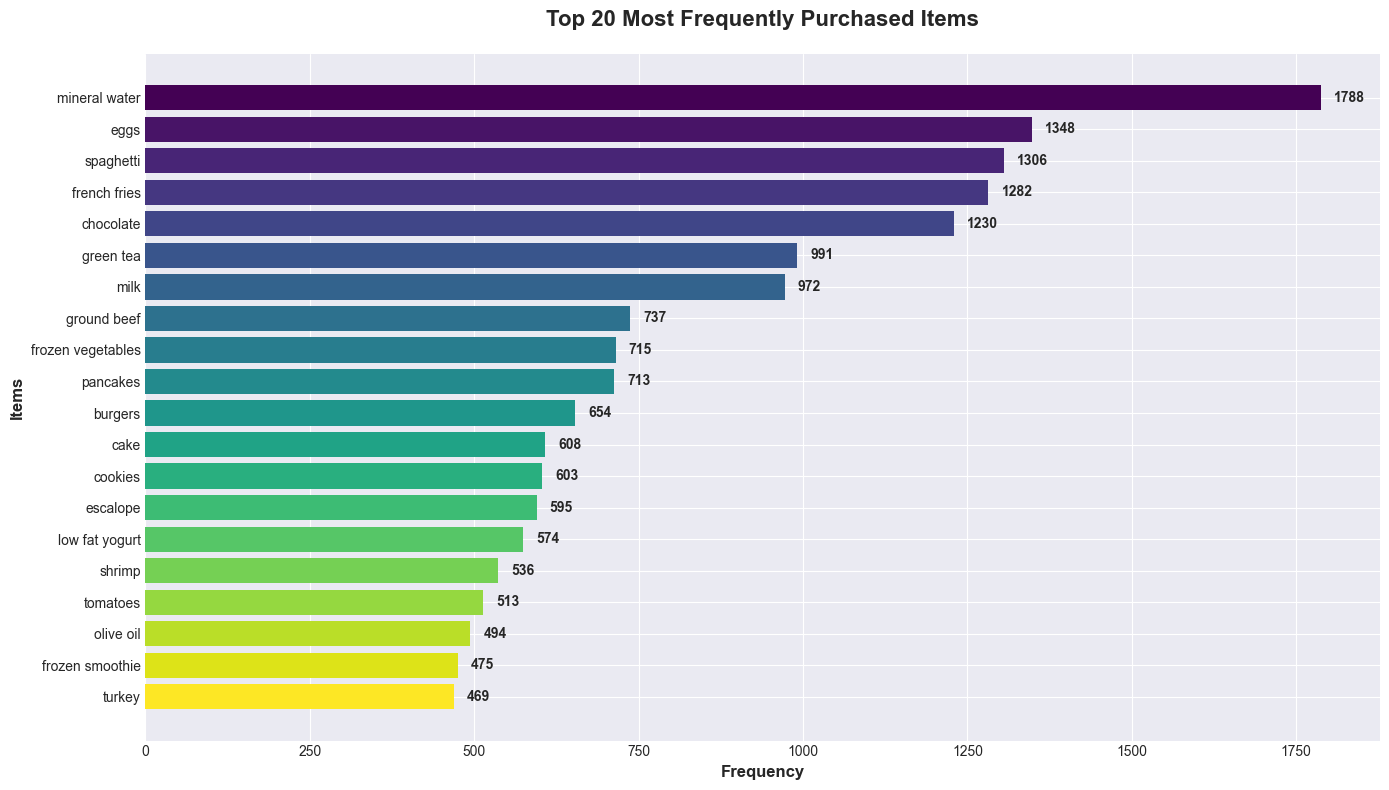

In [8]:
# Visualize top 20 items
plt.figure(figsize=(14, 8))
items = [item[0] for item in top_20_items]
counts = [item[1] for item in top_20_items]

bars = plt.barh(items, counts, color=plt.cm.viridis(np.linspace(0, 1, 20)))
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Items', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Frequently Purchased Items', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    plt.text(count + 20, bar.get_y() + bar.get_height()/2, 
             f'{count}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 3️⃣ Data Preprocessing

We need to convert our transaction data into a **one-hot encoded format** for the Apriori algorithm.

### Why One-Hot Encoding?
- Apriori algorithm requires binary data (True/False for each item)
- Each row = transaction, each column = item
- Value = True if item is in transaction, False otherwise

In [9]:
# Transform transactions into one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

print(f"✅ Data transformed successfully!")
print(f"📊 Shape: {df_encoded.shape} (Transactions × Items)")
print(f"\n🔍 First 5 rows and 10 columns:")
print(df_encoded.iloc[:5, :10])

✅ Data transformed successfully!
📊 Shape: (7501, 119) (Transactions × Items)

🔍 First 5 rows and 10 columns:
   almonds  antioxydant juice  asparagus  avocado  babies food  bacon  \
0     True               True      False     True        False  False   
1    False              False      False    False        False  False   
2    False              False      False    False        False  False   
3    False              False      False     True        False  False   
4    False              False      False    False        False  False   

   barbecue sauce  black tea  blueberries  body spray  
0           False      False        False       False  
1           False      False        False       False  
2           False      False        False       False  
3           False      False        False       False  
4           False      False        False       False  


## 4️⃣ Applying Apriori Algorithm

Now let's find **frequent itemsets** - groups of items that appear together frequently!

We'll use a **minimum support of 2%** (items must appear in at least 2% of transactions)

In [10]:
# Apply Apriori algorithm
min_support = 0.02  # 2% minimum support

print(f"⚙️ Running Apriori algorithm with min_support = {min_support*100}%...\n")

frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print(f"✅ Found {len(frequent_itemsets)} frequent itemsets!")
print(f"\n📊 Distribution by itemset size:")
print(frequent_itemsets['length'].value_counts().sort_index())

⚙️ Running Apriori algorithm with min_support = 2.0%...

✅ Found 103 frequent itemsets!

📊 Distribution by itemset size:
length
1    53
2    50
Name: count, dtype: int64


In [11]:
# Display top frequent itemsets by support
top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(15)

print("🏆 Top 15 Frequent Itemsets:")
print("-" * 70)
for idx, row in top_itemsets.iterrows():
    items = ', '.join(list(row['itemsets']))
    print(f"Support: {row['support']:.4f} ({row['support']*100:.2f}%) | Items: {{{items}}}")

🏆 Top 15 Frequent Itemsets:
----------------------------------------------------------------------
Support: 0.2384 (23.84%) | Items: {mineral water}
Support: 0.1797 (17.97%) | Items: {eggs}
Support: 0.1741 (17.41%) | Items: {spaghetti}
Support: 0.1709 (17.09%) | Items: {french fries}
Support: 0.1638 (16.38%) | Items: {chocolate}
Support: 0.1321 (13.21%) | Items: {green tea}
Support: 0.1296 (12.96%) | Items: {milk}
Support: 0.0983 (9.83%) | Items: {ground beef}
Support: 0.0953 (9.53%) | Items: {frozen vegetables}
Support: 0.0951 (9.51%) | Items: {pancakes}
Support: 0.0872 (8.72%) | Items: {burgers}
Support: 0.0811 (8.11%) | Items: {cake}
Support: 0.0804 (8.04%) | Items: {cookies}
Support: 0.0793 (7.93%) | Items: {escalope}
Support: 0.0765 (7.65%) | Items: {low fat yogurt}


### 📊 Visualize Top Itemsets

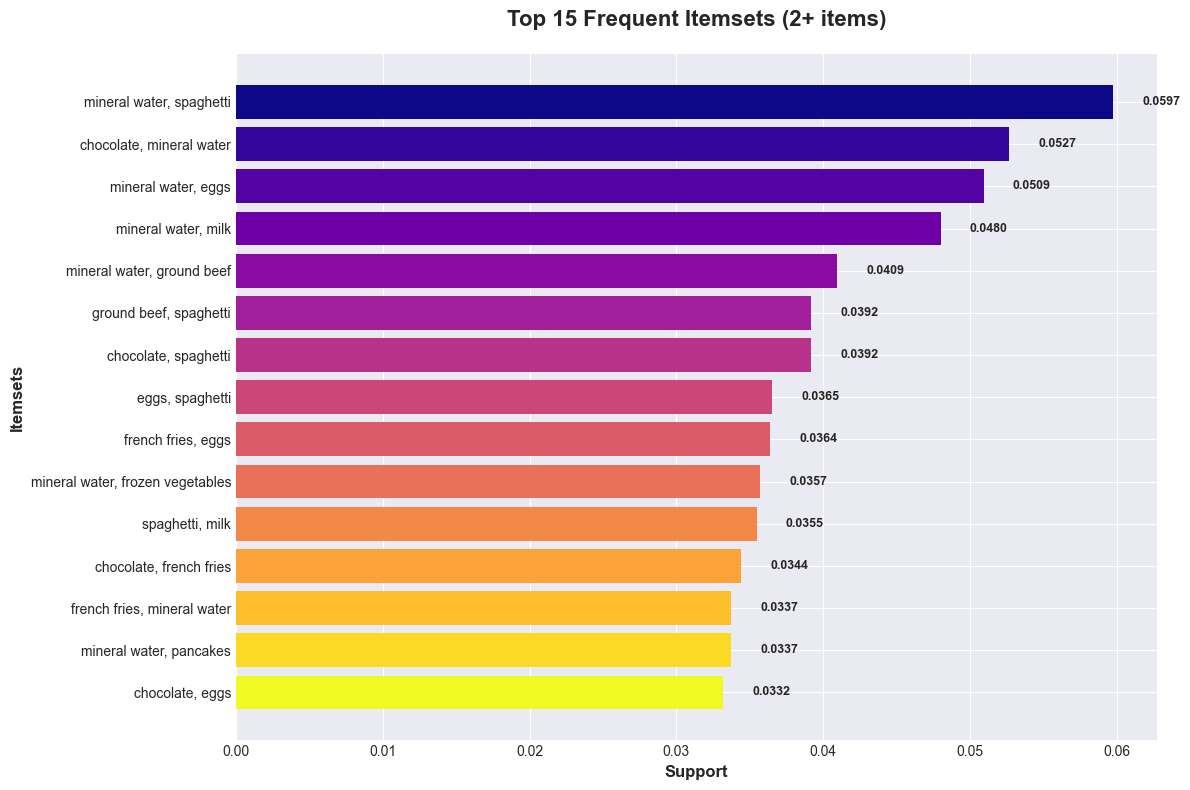

In [12]:
# Visualize top itemsets with 2 or more items
multi_item_sets = frequent_itemsets[frequent_itemsets['length'] >= 2].sort_values('support', ascending=False).head(15)

if len(multi_item_sets) > 0:
    plt.figure(figsize=(12, 8))
    
    # Create labels for itemsets
    labels = [', '.join(list(items)[:3]) + ('...' if len(items) > 3 else '') 
              for items in multi_item_sets['itemsets']]
    
    bars = plt.barh(labels, multi_item_sets['support'], 
                    color=plt.cm.plasma(np.linspace(0, 1, len(labels))))
    
    plt.xlabel('Support', fontsize=12, fontweight='bold')
    plt.ylabel('Itemsets', fontsize=12, fontweight='bold')
    plt.title('Top 15 Frequent Itemsets (2+ items)', fontsize=16, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    
    # Add value labels
    for bar, support in zip(bars, multi_item_sets['support']):
        plt.text(support + 0.002, bar.get_y() + bar.get_height()/2, 
                 f'{support:.4f}', va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ No itemsets with 2+ items found at current support threshold.")

## 5️⃣ Generate Association Rules

Association rules tell us: **"If a customer buys A, they are likely to buy B"**

Format: `A → B` (if A, then B)

In [13]:
# Generate association rules
min_confidence = 0.3  # 30% minimum confidence

print(f"⚙️ Generating association rules with min_confidence = {min_confidence*100}%...\n")

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Add additional metrics
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))

print(f"✅ Generated {len(rules)} association rules!")

⚙️ Generating association rules with min_confidence = 30.0%...

✅ Generated 20 association rules!


In [14]:
# Sort by lift to find strongest associations
top_rules = rules.sort_values('lift', ascending=False).head(20)

print("🏆 Top 20 Association Rules (by Lift):")
print("=" * 100)
print(f"{'Rule':<50} {'Support':<12} {'Confidence':<12} {'Lift':<10}")
print("=" * 100)

for idx, row in top_rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    rule_str = f"{{{antecedent}}} → {{{consequent}}}"
    
    # Truncate long rules
    if len(rule_str) > 48:
        rule_str = rule_str[:45] + "..."
    
    print(f"{rule_str:<50} {row['support']:.4f} ({row['support']*100:>5.2f}%)  "
          f"{row['confidence']:.4f} ({row['confidence']*100:>5.2f}%)  "
          f"{row['lift']:>6.2f}")

🏆 Top 20 Association Rules (by Lift):
Rule                                               Support      Confidence   Lift      
{ground beef} → {spaghetti}                        0.0392 ( 3.92%)  0.3989 (39.89%)    2.29
{olive oil} → {spaghetti}                          0.0229 ( 2.29%)  0.3482 (34.82%)    2.00
{soup} → {mineral water}                           0.0231 ( 2.31%)  0.4565 (45.65%)    1.91
{burgers} → {eggs}                                 0.0288 ( 2.88%)  0.3303 (33.03%)    1.84
{olive oil} → {mineral water}                      0.0276 ( 2.76%)  0.4190 (41.90%)    1.76
{tomatoes} → {spaghetti}                           0.0209 ( 2.09%)  0.3060 (30.60%)    1.76
{ground beef} → {mineral water}                    0.0409 ( 4.09%)  0.4166 (41.66%)    1.75
{cooking oil} → {mineral water}                    0.0201 ( 2.01%)  0.3943 (39.43%)    1.65
{chicken} → {mineral water}                        0.0228 ( 2.28%)  0.3800 (38.00%)    1.59
{frozen vegetables} → {mineral water}         

## 6️⃣ Understanding the Metrics with Real Examples

Let's pick one rule and explain it in detail!

In [16]:
# Get the top rule
if len(rules) > 0:
    best_rule = rules.sort_values('lift', ascending=False).iloc[0]
    
    antecedent = ', '.join(list(best_rule['antecedents']))
    consequent = ', '.join(list(best_rule['consequents']))
    
    print("📌 EXAMPLE RULE EXPLANATION")
    print("=" * 80)
    print(f"\n🔹 Rule: {{{antecedent}}} → {{{consequent}}}")
    print(f"\n📊 METRICS:")
    print(f"\n1. Support = {best_rule['support']:.4f} ({best_rule['support']*100:.2f}%)")
    print(f"   → This itemset appears in {best_rule['support']*100:.2f}% of all transactions")
    print(f"   → Out of {len(transactions)} transactions, {int(best_rule['support']*len(transactions))} contain these items")
    
    print(f"\n2. Confidence = {best_rule['confidence']:.4f} ({best_rule['confidence']*100:.2f}%)")
    print(f"   → When customers buy {{{antecedent}}},")
    print(f"   → There's a {best_rule['confidence']*100:.2f}% chance they also buy {{{consequent}}}")
    
    print(f"\n3. Lift = {best_rule['lift']:.2f}")
    if best_rule['lift'] > 1:
        print(f"   → {{{consequent}}} is {best_rule['lift']:.2f}x more likely to be bought with {{{antecedent}}}")
        print(f"   → This is a STRONG positive association!")
    elif best_rule['lift'] == 1:
        print(f"   → No relationship between these items")
    else:
        print(f"   → Negative relationship (items are bought independently)")
    
    print("\n" + "=" * 80)
else:
    print("No rules generated. Try lowering the confidence threshold.")

📌 EXAMPLE RULE EXPLANATION

🔹 Rule: {ground beef} → {spaghetti}

📊 METRICS:

1. Support = 0.0392 (3.92%)
   → This itemset appears in 3.92% of all transactions
   → Out of 7501 transactions, 294 contain these items

2. Confidence = 0.3989 (39.89%)
   → When customers buy {ground beef},
   → There's a 39.89% chance they also buy {spaghetti}

3. Lift = 2.29
   → {spaghetti} is 2.29x more likely to be bought with {ground beef}
   → This is a STRONG positive association!



## 7️⃣ Data Visualizations

Let's create beautiful visualizations to understand the patterns!

### 📊 Scatter Plot: Support vs Confidence (colored by Lift)

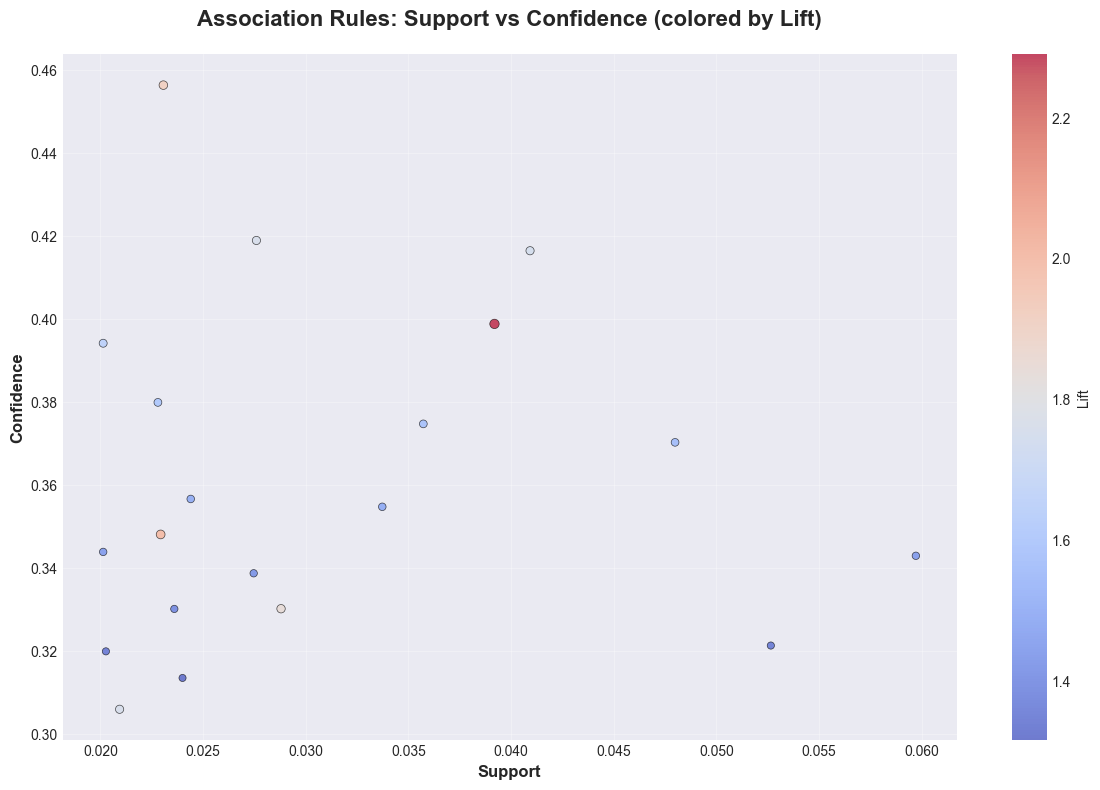

In [17]:
if len(rules) > 0:
    plt.figure(figsize=(12, 8))
    
    scatter = plt.scatter(rules['support'], rules['confidence'], 
                         c=rules['lift'], s=rules['lift']*20, 
                         cmap='coolwarm', alpha=0.7, edgecolors='black', linewidth=0.5)
    
    plt.colorbar(scatter, label='Lift')
    plt.xlabel('Support', fontsize=12, fontweight='bold')
    plt.ylabel('Confidence', fontsize=12, fontweight='bold')
    plt.title('Association Rules: Support vs Confidence (colored by Lift)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No rules to visualize.")

### 📊 Top Rules by Lift

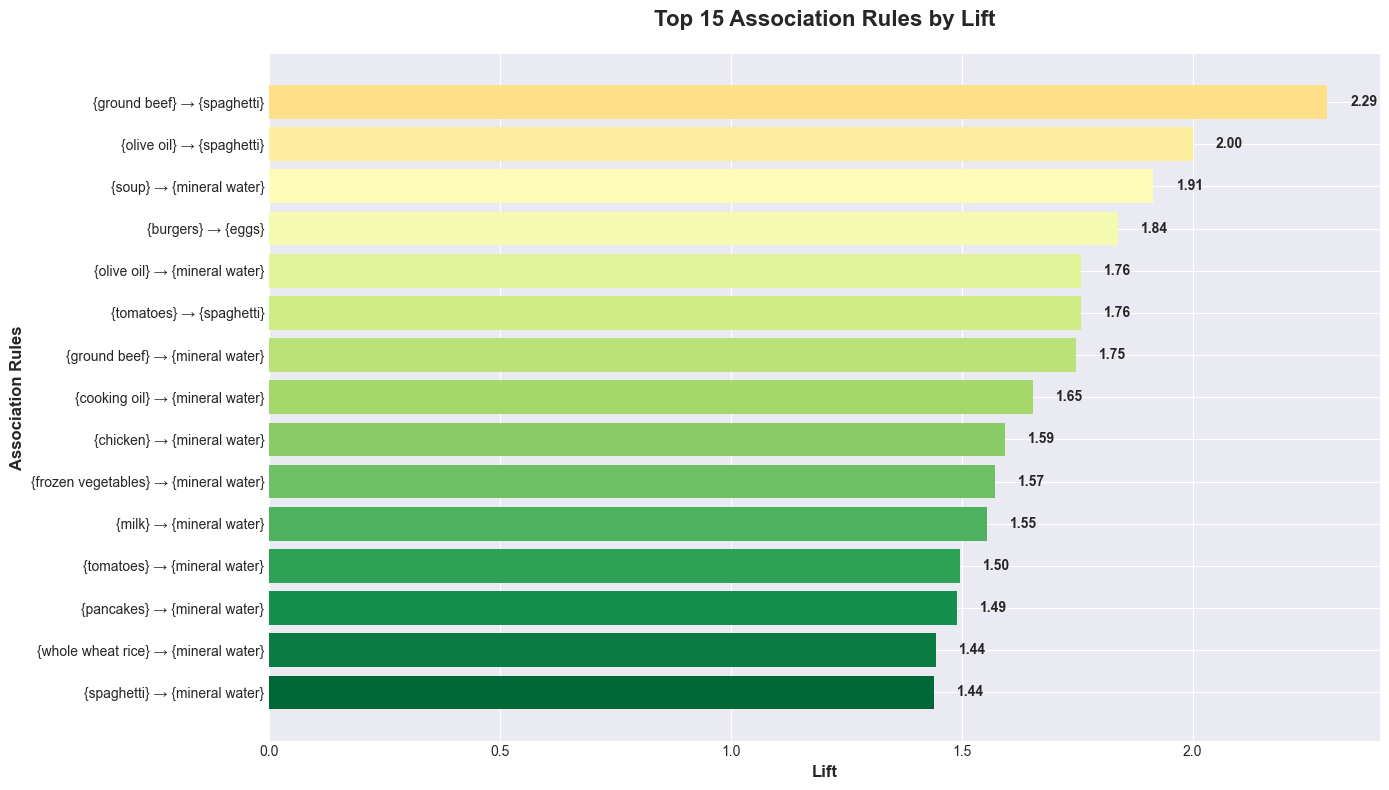

In [18]:
if len(rules) > 0:
    top_15_rules = rules.sort_values('lift', ascending=False).head(15)
    
    plt.figure(figsize=(14, 8))
    
    # Create rule labels
    rule_labels = []
    for idx, row in top_15_rules.iterrows():
        ant = ', '.join(list(row['antecedents'])[:2])
        cons = ', '.join(list(row['consequents'])[:2])
        rule_labels.append(f"{{{ant}}} → {{{cons}}}")
    
    bars = plt.barh(rule_labels, top_15_rules['lift'], 
                    color=plt.cm.RdYlGn(np.linspace(0.4, 1, 15)))
    
    plt.xlabel('Lift', fontsize=12, fontweight='bold')
    plt.ylabel('Association Rules', fontsize=12, fontweight='bold')
    plt.title('Top 15 Association Rules by Lift', fontsize=16, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    
    # Add value labels
    for bar, lift in zip(bars, top_15_rules['lift']):
        plt.text(lift + 0.05, bar.get_y() + bar.get_height()/2, 
                 f'{lift:.2f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("No rules to visualize.")

### 🕸️ Network Graph of Association Rules

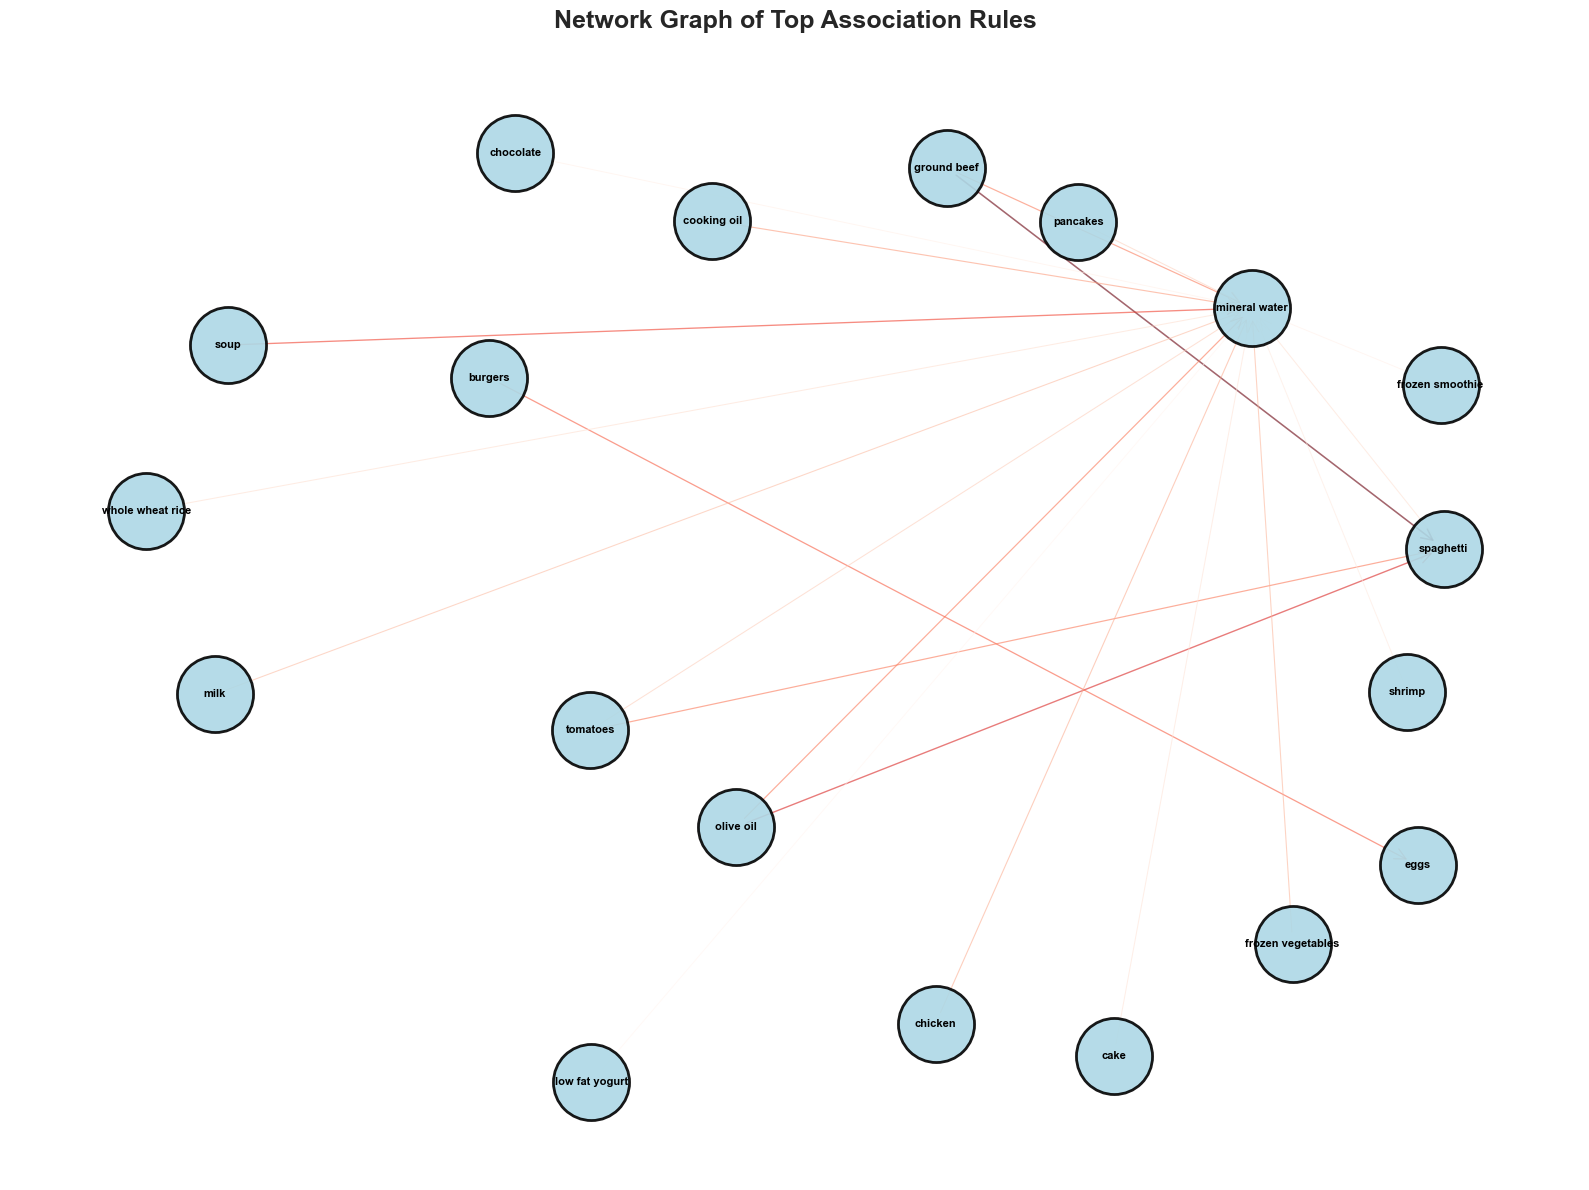

In [19]:
if len(rules) > 0:
    # Create network graph for top rules
    top_rules_network = rules.sort_values('lift', ascending=False).head(20)
    
    G = nx.DiGraph()
    
    # Add edges with weights
    for idx, row in top_rules_network.iterrows():
        ant = ', '.join(list(row['antecedents'])[:2])
        cons = ', '.join(list(row['consequents'])[:2])
        G.add_edge(ant, cons, weight=row['lift'])
    
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', 
                          alpha=0.9, edgecolors='black', linewidths=2)
    
    # Draw edges with varying thickness based on lift
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    nx.draw_networkx_edges(G, pos, width=[w*0.5 for w in weights], 
                          alpha=0.6, edge_color=weights, 
                          edge_cmap=plt.cm.Reds, arrows=True, 
                          arrowsize=20, arrowstyle='->')
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    
    plt.title('Network Graph of Top Association Rules', fontsize=18, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No rules to visualize.")

### 📊 Heatmap: Top Item Associations

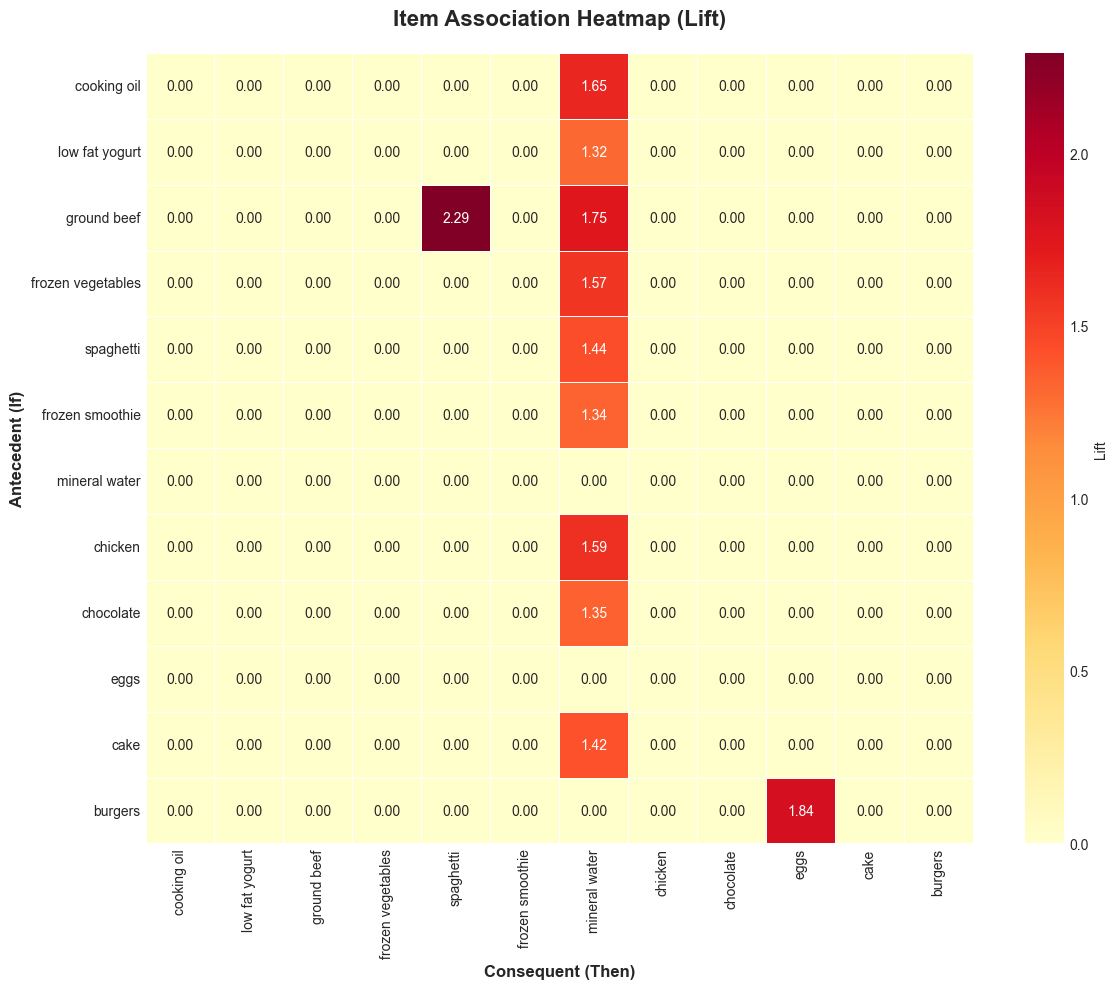

In [20]:
if len(rules) > 0:
    # Create a matrix of top items and their associations
    top_items_for_heatmap = list(set(
        [list(x)[0] for x in rules['antecedents'].head(10)] + 
        [list(x)[0] for x in rules['consequents'].head(10)]
    ))[:15]
    
    # Create association matrix
    association_matrix = pd.DataFrame(0.0, index=top_items_for_heatmap, columns=top_items_for_heatmap)
    
    for idx, row in rules.iterrows():
        ant = list(row['antecedents'])
        cons = list(row['consequents'])
        
        for a in ant:
            for c in cons:
                if a in top_items_for_heatmap and c in top_items_for_heatmap:
                    association_matrix.loc[a, c] = max(association_matrix.loc[a, c], row['lift'])
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(association_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
                cbar_kws={'label': 'Lift'}, linewidths=0.5)
    plt.title('Item Association Heatmap (Lift)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Consequent (Then)', fontsize=12, fontweight='bold')
    plt.ylabel('Antecedent (If)', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No rules to visualize.")

## 8️⃣ Interactive Recommendation System

Now let's build a system that recommends products based on what a customer is buying!

In [22]:
def get_recommendations(item_name, top_n=5):
    """
    Get product recommendations based on an item.
    
    Parameters:
    -----------
    item_name : str
        The item to get recommendations for
    top_n : int
        Number of recommendations to return
    
    Returns:
    --------
    DataFrame with recommendations
    """
    
    if len(rules) == 0:
        return "No rules available. Try lowering the confidence threshold."
    
    # Find rules where the item is in antecedents
    item_rules = rules[rules['antecedents'].apply(lambda x: item_name in x)]
    
    if len(item_rules) == 0:
        return f"No recommendations found for '{item_name}'. Try another item or check spelling."
    
    # Sort by lift and get top N
    top_recommendations = item_rules.sort_values('lift', ascending=False).head(top_n)
    
    # Format output
    recommendations = []
    for idx, row in top_recommendations.iterrows():
        recommendations.append({
            'Recommended Item(s)': ', '.join(list(row['consequents'])),
            'Support': f"{row['support']:.4f}",
            'Confidence': f"{row['confidence']:.4f} ({row['confidence']*100:.1f}%)",
            'Lift': f"{row['lift']:.2f}"
        })
    
    result_df = pd.DataFrame(recommendations)
    
    print(f"\n🎯 Recommendations for customers buying '{item_name}':")
    print("=" * 90)
    print(result_df.to_string(index=False))
    print("=" * 90)
    
    return result_df

print("✅ Recommendation system ready!")

✅ Recommendation system ready!


### 🧪 Test the Recommendation System

In [23]:
# Test with popular items
test_items = ['mineral water', 'eggs', 'chocolate', 'spaghetti', 'milk']

for item in test_items:
    get_recommendations(item, top_n=5)
    print("\n")






🎯 Recommendations for customers buying 'chocolate':
Recommended Item(s) Support     Confidence Lift
      mineral water  0.0527 0.3214 (32.1%) 1.35



🎯 Recommendations for customers buying 'spaghetti':
Recommended Item(s) Support     Confidence Lift
      mineral water  0.0597 0.3430 (34.3%) 1.44



🎯 Recommendations for customers buying 'milk':
Recommended Item(s) Support     Confidence Lift
      mineral water  0.0480 0.3704 (37.0%) 1.55




### 🎮 Try Your Own Item!

In [24]:
# Enter your own item here
your_item = 'french fries'  # Change this to any item!

get_recommendations(your_item, top_n=10)

"No recommendations found for 'french fries'. Try another item or check spelling."

### 📋 Available Items Reference

In [25]:
# Display all available items (sorted alphabetically)
print("📦 All Available Items in Dataset:")
print("=" * 80)
sorted_items = sorted(list(unique_items))
for i in range(0, len(sorted_items), 5):
    print("  " + ", ".join(sorted_items[i:i+5]))
print("\n" + "=" * 80)
print(f"Total: {len(sorted_items)} items")

📦 All Available Items in Dataset:
  almonds, antioxydant juice, asparagus, avocado, babies food
  bacon, barbecue sauce, black tea, blueberries, body spray
  bramble, brownies, bug spray, burger sauce, burgers
  butter, cake, candy bars, carrots, cauliflower
  cereals, champagne, chicken, chili, chocolate
  chocolate bread, chutney, cider, clothes accessories, cookies
  cooking oil, corn, cottage cheese, cream, dessert wine
  eggplant, eggs, energy bar, energy drink, escalope
  extra dark chocolate, flax seed, french fries, french wine, fresh bread
  fresh tuna, fromage blanc, frozen smoothie, frozen vegetables, gluten free bar
  grated cheese, green beans, green grapes, green tea, ground beef
  gums, ham, hand protein bar, herb & pepper, honey
  hot dogs, ketchup, light cream, light mayo, low fat yogurt
  magazines, mashed potato, mayonnaise, meatballs, melons
  milk, mineral water, mint, mint green tea, muffins
  mushroom cream sauce, napkins, nonfat milk, oatmeal, oil
  olive oil, p

## 9️⃣ Business Insights & Recommendations

Based on our analysis, here are actionable business insights!

In [26]:
print("💼 BUSINESS INSIGHTS FROM MARKET BASKET ANALYSIS")
print("=" * 90)

if len(rules) > 0:
    # Get strongest rules
    strongest_rules = rules.sort_values('lift', ascending=False).head(5)
    
    print("\n1️⃣ PRODUCT BUNDLING OPPORTUNITIES:")
    print("-" * 90)
    print("   Create special bundle offers for these high-lift item combinations:\n")
    for idx, row in strongest_rules.iterrows():
        ant = ', '.join(list(row['antecedents']))
        cons = ', '.join(list(row['consequents']))
        print(f"   📦 Bundle: {{{ant}}} + {{{cons}}}")
        print(f"      → Lift: {row['lift']:.2f}x | Confidence: {row['confidence']*100:.1f}%")
        print()
    
    print("\n2️⃣ STORE LAYOUT OPTIMIZATION:")
    print("-" * 90)
    print("   Place these items near each other to increase cross-selling:\n")
    for idx, row in strongest_rules.head(3).iterrows():
        ant = ', '.join(list(row['antecedents']))
        cons = ', '.join(list(row['consequents']))
        print(f"   🏪 {ant} ← → {cons}")
    
    print("\n\n3️⃣ PROMOTIONAL STRATEGIES:")
    print("-" * 90)
    print("   💡 Cross-Promotion: Offer discounts on consequent items when customers buy antecedent items")
    print("   💡 Email Marketing: Send personalized recommendations based on purchase history")
    print("   💡 Point-of-Sale: Display recommended items at checkout based on cart contents")
    
    print("\n\n4️⃣ INVENTORY MANAGEMENT:")
    print("-" * 90)
    top_items_list = [item[0] for item in top_20_items[:5]]
    print(f"   📊 High-priority stock items: {', '.join(top_items_list)}")
    print("   → These items appear in many association rules and should always be in stock")
    
    print("\n\n5️⃣ CUSTOMER SEGMENTATION:")
    print("-" * 90)
    print("   👥 Identify customer segments based on frequent item combinations")
    print("   → Create targeted marketing campaigns for different segments")
    
else:
    print("\n⚠️ Not enough rules generated for insights.")
    print("Try lowering the minimum support or confidence thresholds.")

print("\n" + "=" * 90)

💼 BUSINESS INSIGHTS FROM MARKET BASKET ANALYSIS

1️⃣ PRODUCT BUNDLING OPPORTUNITIES:
------------------------------------------------------------------------------------------
   Create special bundle offers for these high-lift item combinations:

   📦 Bundle: {ground beef} + {spaghetti}
      → Lift: 2.29x | Confidence: 39.9%

   📦 Bundle: {olive oil} + {spaghetti}
      → Lift: 2.00x | Confidence: 34.8%

   📦 Bundle: {soup} + {mineral water}
      → Lift: 1.91x | Confidence: 45.6%

   📦 Bundle: {burgers} + {eggs}
      → Lift: 1.84x | Confidence: 33.0%

   📦 Bundle: {olive oil} + {mineral water}
      → Lift: 1.76x | Confidence: 41.9%


2️⃣ STORE LAYOUT OPTIMIZATION:
------------------------------------------------------------------------------------------
   Place these items near each other to increase cross-selling:

   🏪 ground beef ← → spaghetti
   🏪 olive oil ← → spaghetti
   🏪 soup ← → mineral water


3️⃣ PROMOTIONAL STRATEGIES:
------------------------------------------------

## 🎯 Summary

### What We Accomplished:

✅ **Loaded and explored** transaction data  
✅ **Preprocessed** data for Apriori algorithm  
✅ **Applied Apriori** to find frequent itemsets  
✅ **Generated association rules** with Support, Confidence, and Lift  
✅ **Created visualizations** to understand patterns  
✅ **Built recommendation system** for product suggestions  
✅ **Derived business insights** for actionable strategies  

### Key Takeaways:

- **Support**: Measures how frequently items appear together
- **Confidence**: Measures how likely items are bought together
- **Lift > 1**: Strong positive association (items complement each other)
- **Applications**: Product bundling, store layout, promotions, inventory management

### Next Steps:

1. Experiment with different support/confidence thresholds
2. Analyze seasonal patterns (if date data is available)
3. Implement real-time recommendations in e-commerce platform
4. A/B test bundle offers based on high-lift rules

---

**🎉 Congratulations! You've completed Market Basket Analysis using the Apriori Algorithm!**